In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,\
Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import re

In [28]:
data = """My name is Shivang Thigale, and I’m working on deep learning lab assignments as part of my studies. These assignments help me learn how to use different deep learning tools like TensorFlow, Keras, Theano, and PyTorch to solve problems using computers. In these assignments, we study how computers process information. A computational process is like an invisible machine inside the computer that works with data. The way this process works is controlled by rules, and these rules are written in something called a program. People create programs to tell computers what to do. As I work with these deep learning tools, I’m learning how to create models that can understand data. These tools are like magic spells that help computers learn and solve problems more efficiently. Through this, I am gaining practical experience in machine learning and artificial intelligence."""

In [29]:
sentences = data.split(".")

In [30]:
sentences

['My name is Shivang Thigale, and I’m working on deep learning lab assignments as part of my studies',
 ' These assignments help me learn how to use different deep learning tools like TensorFlow, Keras, Theano, and PyTorch to solve problems using computers',
 ' In these assignments, we study how computers process information',
 ' A computational process is like an invisible machine inside the computer that works with data',
 ' The way this process works is controlled by rules, and these rules are written in something called a program',
 ' People create programs to tell computers what to do',
 ' As I work with these deep learning tools, I’m learning how to create models that can understand data',
 ' These tools are like magic spells that help computers learn and solve problems more efficiently',
 ' Through this, I am gaining practical experience in machine learning and artificial intelligence',
 '']

In [31]:
clean_sentences = []
for sentence in sentences:
    # skip empty string
  if sentence == "":
    continue;
    # remove special characters
  sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence)
    # remove 1 letter words
  sentence = re.sub(r'(?:^| )\w(?:$| )', ' ', sentence).strip() # lower all characters
  sentence = sentence.lower()
  clean_sentences.append(sentence)

In [32]:
clean_sentences

['my name is shivang thigale and m working on deep learning lab assignments as part of my studies',
 'these assignments help me learn how to use different deep learning tools like tensorflow keras theano and pytorch to solve problems using computers',
 'in these assignments we study how computers process information',
 'computational process is like an invisible machine inside the computer that works with data',
 'the way this process works is controlled by rules and these rules are written in something called program',
 'people create programs to tell computers what to do',
 'as work with these deep learning tools m learning how to create models that can understand data',
 'these tools are like magic spells that help computers learn and solve problems more efficiently',
 'through this am gaining practical experience in machine learning and artificial intelligence']

In [33]:
# Define the corpus
corpus = clean_sentences

In [34]:
# Convert the corpus to a sequence of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print("After converting our words in the corpus \ into vector of integers:")
print(sequences)

After converting our words in the corpus \ into vector of integers:
[[15, 31, 6, 32, 33, 1, 16, 34, 35, 7, 2, 36, 8, 17, 37, 38, 15, 39], [3, 8, 18, 40, 19, 9, 4, 41, 42, 7, 2, 10, 11, 43, 44, 45, 1, 46, 4, 20, 21, 47, 5], [12, 3, 8, 48, 49, 9, 5, 13, 50], [51, 13, 6, 11, 52, 53, 22, 54, 23, 55, 14, 24, 25, 26], [23, 56, 27, 13, 24, 6, 57, 58, 28, 1, 3, 28, 29, 59, 12, 60, 61, 62], [63, 30, 64, 4, 65, 5, 66, 4, 67], [17, 68, 25, 3, 7, 2, 10, 16, 2, 9, 4, 30, 69, 14, 70, 71, 26], [3, 10, 29, 11, 72, 73, 14, 18, 5, 19, 1, 20, 21, 74, 75], [76, 27, 77, 78, 79, 80, 12, 22, 2, 1, 81, 82]]


In [35]:
# creating dictionary for word to index and index to word
index_to_word_map = {}
word_to_index_map = {}
for index_1, sequence in enumerate(sequences):
  print(sequence)
  words_in_sentence = clean_sentences[index_1].split()
  print(words_in_sentence)
  for index_2, value in enumerate(sequence):
    index_to_word_map[value] = words_in_sentence[index_2]
    word_to_index_map[words_in_sentence[index_2]] = value

[15, 31, 6, 32, 33, 1, 16, 34, 35, 7, 2, 36, 8, 17, 37, 38, 15, 39]
['my', 'name', 'is', 'shivang', 'thigale', 'and', 'm', 'working', 'on', 'deep', 'learning', 'lab', 'assignments', 'as', 'part', 'of', 'my', 'studies']
[3, 8, 18, 40, 19, 9, 4, 41, 42, 7, 2, 10, 11, 43, 44, 45, 1, 46, 4, 20, 21, 47, 5]
['these', 'assignments', 'help', 'me', 'learn', 'how', 'to', 'use', 'different', 'deep', 'learning', 'tools', 'like', 'tensorflow', 'keras', 'theano', 'and', 'pytorch', 'to', 'solve', 'problems', 'using', 'computers']
[12, 3, 8, 48, 49, 9, 5, 13, 50]
['in', 'these', 'assignments', 'we', 'study', 'how', 'computers', 'process', 'information']
[51, 13, 6, 11, 52, 53, 22, 54, 23, 55, 14, 24, 25, 26]
['computational', 'process', 'is', 'like', 'an', 'invisible', 'machine', 'inside', 'the', 'computer', 'that', 'works', 'with', 'data']
[23, 56, 27, 13, 24, 6, 57, 58, 28, 1, 3, 28, 29, 59, 12, 60, 61, 62]
['the', 'way', 'this', 'process', 'works', 'is', 'controlled', 'by', 'rules', 'and', 'these',

In [36]:
print(index_to_word_map)
print("\n")
print(word_to_index_map)

{15: 'my', 31: 'name', 6: 'is', 32: 'shivang', 33: 'thigale', 1: 'and', 16: 'm', 34: 'working', 35: 'on', 7: 'deep', 2: 'learning', 36: 'lab', 8: 'assignments', 17: 'as', 37: 'part', 38: 'of', 39: 'studies', 3: 'these', 18: 'help', 40: 'me', 19: 'learn', 9: 'how', 4: 'to', 41: 'use', 42: 'different', 10: 'tools', 11: 'like', 43: 'tensorflow', 44: 'keras', 45: 'theano', 46: 'pytorch', 20: 'solve', 21: 'problems', 47: 'using', 5: 'computers', 12: 'in', 48: 'we', 49: 'study', 13: 'process', 50: 'information', 51: 'computational', 52: 'an', 53: 'invisible', 22: 'machine', 54: 'inside', 23: 'the', 55: 'computer', 14: 'that', 24: 'works', 25: 'with', 26: 'data', 56: 'way', 27: 'this', 57: 'controlled', 58: 'by', 28: 'rules', 29: 'are', 59: 'written', 60: 'something', 61: 'called', 62: 'program', 63: 'people', 30: 'create', 64: 'programs', 65: 'tell', 66: 'what', 67: 'do', 68: 'work', 69: 'models', 70: 'can', 71: 'understand', 72: 'magic', 73: 'spells', 74: 'more', 75: 'efficiently', 76: 'thr

In [37]:
# Define the parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 10
window_size = 2
# Generate the context-target pairs
contexts = []
targets = []
for sequence in sequences:
  for i in range(window_size, len(sequence) - window_size):
    context = sequence[i - window_size:i] + sequence[i + 1:i + window_size + 1]
    target = sequence[i]
    contexts.append(context)
    targets.append(target)

In [38]:
# sample of training data
for i in range(5):
  words = []
  target = index_to_word_map.get(targets[i])
  for j in contexts[i]:
    words.append(index_to_word_map.get(j))
    print(words, "=>", target)

['my'] => is
['my', 'name'] => is
['my', 'name', 'shivang'] => is
['my', 'name', 'shivang', 'thigale'] => is
['name'] => shivang
['name', 'is'] => shivang
['name', 'is', 'thigale'] => shivang
['name', 'is', 'thigale', 'and'] => shivang
['is'] => thigale
['is', 'shivang'] => thigale
['is', 'shivang', 'and'] => thigale
['is', 'shivang', 'and', 'm'] => thigale
['shivang'] => and
['shivang', 'thigale'] => and
['shivang', 'thigale', 'm'] => and
['shivang', 'thigale', 'm', 'working'] => and
['thigale'] => m
['thigale', 'and'] => m
['thigale', 'and', 'working'] => m
['thigale', 'and', 'working', 'on'] => m


In [39]:
# Convert the contexts and targets to numpy arrays
X = np.array(contexts)
Y = np.array(targets)

In [40]:
# Define the CBOW model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=2 * window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(units=vocab_size, activation='softmax'))
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
model.fit(X, Y, epochs=200, verbose=1)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0184 - loss: 4.4194   
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0718 - loss: 4.4104 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0750 - loss: 4.4021  
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0774 - loss: 4.3877 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0710 - loss: 4.3701 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0865 - loss: 4.3332 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0896 - loss: 4.2907 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0709 - loss: 4.2372 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0990 - loss: 4.1315 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0990 - loss: 4.0580 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0802 - loss: 4.0193 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0990 - loss: 3.9451

In [41]:
# Get the word embeddings
embeddings = model.get_weights()[0]
# Perform PCA to reduce the dimensionality of the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

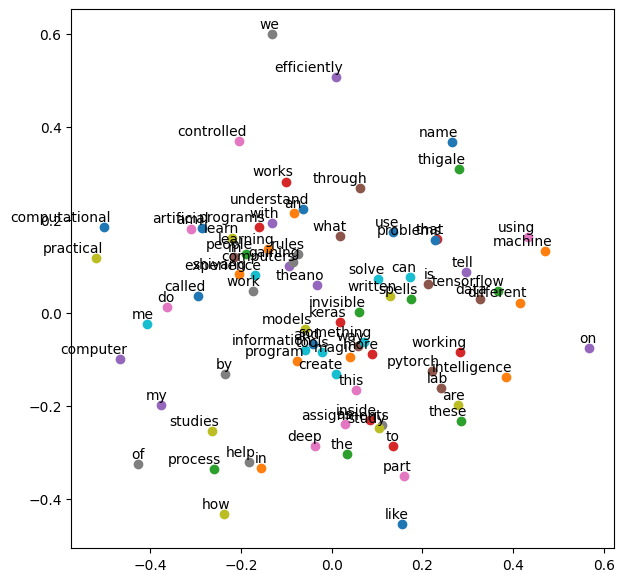

In [42]:
# Visualize the embeddings
plt.figure(figsize=(7, 7))
for i, word in enumerate(tokenizer.word_index.keys()):
  x, y = reduced_embeddings[i]
  plt.scatter(x, y)
  plt.annotate(word, xy=(x, y), xytext=(5, 2),
               textcoords='offset points',
               ha='right', va='bottom')
plt.show()

In [43]:
import numpy as np
test_sentences = [
    "Shivang Thigale is doing deep learning lab assignments",
    "We are studying computational processes and data",
    "People create programs to direct processes",
    "Processes manipulate abstract things called data",
    "The evolution of a process is guided by a program",
    "Deep learning uses tools like TensorFlow and Keras",
    "Computers process information using programs",
    "Neural networks solve problems using data"
]

In [44]:
for test_sentence in test_sentences:
  test_words = test_sentence.split(" ")
  print("Words: ", test_words)

  x_test = []
  for word in test_words:
    index = word_to_index_map.get(word)
    if index is not None:
      x_test.append(index)
    else:
      x_test.append(0)
    # If no valid indices, skip this sentence
  if len(x_test) == 0:
    print("No valid words found in the test sentence.")
    continue
  x_test = np.array([x_test]) # Reshape to fit model input
  print("Indices: ", x_test)
    # Ensure the input shape is correct for the model
  if x_test.shape[1] < 7:
    x_test = np.pad(x_test, ((0, 0), (0, 7 - x_test.shape[1])), 'constant')

  test_predictions = model.predict(x_test)
  y_pred = np.argmax(test_predictions[0])
  print("Predictions: ", test_words, " => ", index_to_word_map.get(y_pred))
  print("\n")

Words:  ['Shivang', 'Thigale', 'is', 'doing', 'deep', 'learning', 'lab', 'assignments']
Indices:  [[ 0  0  6  0  7  2 36  8]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predictions:  ['Shivang', 'Thigale', 'is', 'doing', 'deep', 'learning', 'lab', 'assignments']  =>  learning


Words:  ['We', 'are', 'studying', 'computational', 'processes', 'and', 'data']
Indices:  [[ 0 29  0 51  0  1 26]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predictions:  ['We', 'are', 'studying', 'computational', 'processes', 'and', 'data']  =>  machine


Words:  ['People', 'create', 'programs', 'to', 'direct', 'processes']
Indices:  [[ 0 30 64  4  0  0]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predictions:  ['People', 'create', 'programs', 'to', 'direct', 'processes']  =>  pytorch


Words:  ['Processes', 'manipulate', 'abstract', 'things', 'called', 'data']
Indices:  [[ 0  0  0  0 61 26]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predictions:  ['Processes', 'manipulate', 'abstract', 'things', 'called', 'data']  =>  study


Wo